# Titanic Surival Exploration

Read dataset

In [26]:
import numpy as np
import pandas as pd

from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

dataset = pd.read_csv('titanic_data.csv')

display(dataset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [27]:
outcomes = dataset['Survived']
data = dataset.drop('Survived', axis = 1)

display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Measure Accuracy for Predictions

In [28]:
def accuracy_score(truth, pred):
    
    if len(truth) == len(pred): 
        
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
predictions = pd.Series(np.ones(5, dtype = int))
print (accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


Model with no features. Always predicts a passenger did not survive

In [29]:
def noFeature_predictions(data):
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)
predictions = noFeature_predictions(data)

Predictions have an accuracy of 61.62%.


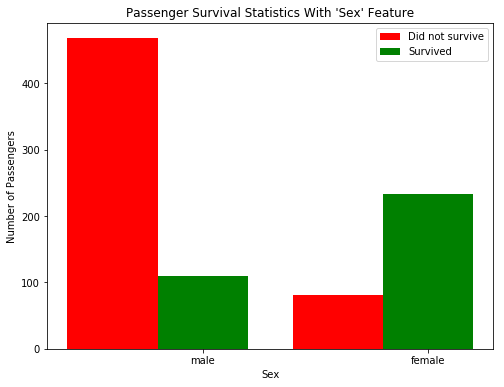

In [30]:
print (accuracy_score(outcomes, predictions))
survival_stats(data, outcomes, 'Sex')

Model with one feature:- Predict a passenger survived if they are female

In [31]:
def oneFeaturePredictions(data):
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
predictions = oneFeaturePredictions(data)

Predictions have an accuracy of 78.68%.


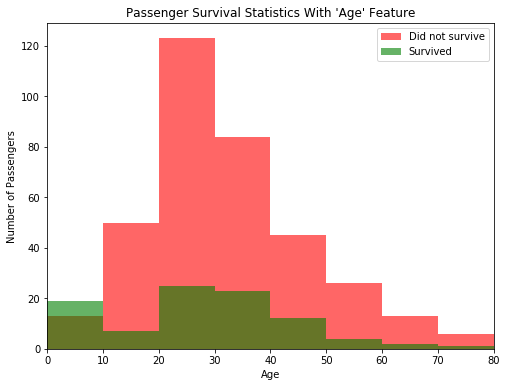

In [32]:
print (accuracy_score(outcomes, predictions))
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Model with two features:  Predict a passenger survived if they are female. Predict a passenger survived if they are male and younger than 10

In [33]:
def twoFeaturePrediction(data):
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female' or passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
predictions = twoFeaturePrediction(data)

Predictions have an accuracy of 79.35%.


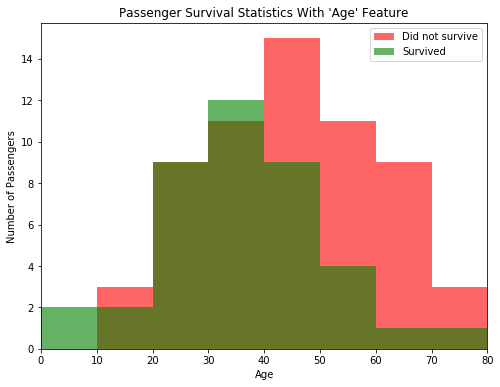

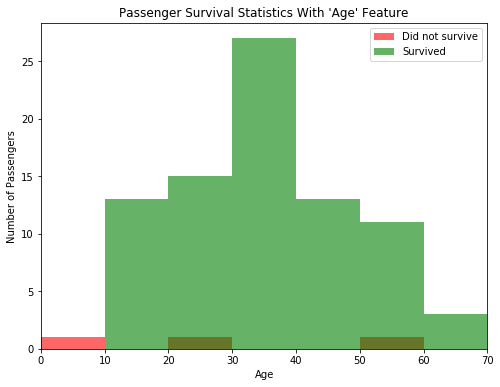

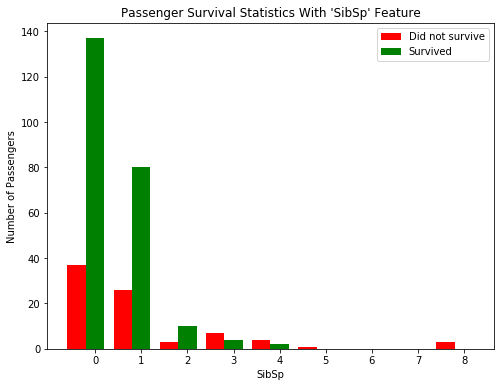

In [34]:
print (accuracy_score(outcomes, predictions))
survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Pclass == 1"])
survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 1"])
survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

Model with multiple features. Makes a prediction with an accuracy of at least 80%.

In [35]:
def multiFeaturePredictions(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['SibSp'] > 4:
            predictions.append(0)
        elif passenger['Sex'] == 'female' and passenger['Parch'] < 4:
            predictions.append(1)
        elif passenger['Sex'] == 'female' and passenger['Pclass'] == 1 and passenger['Age'] > 10:
            predictions.append(1)
        elif passenger['Sex'] == 'female' and passenger['Age'] > 50:
            predictions.append(1)
        elif passenger['Age'] < 10 and passenger['SibSp'] < 3 and passenger['Sex'] == 'male':
            predictions.append(1)
        elif passenger['Age'] < 10 and passenger['Pclass'] == 2:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)

predictions = multiFeaturePredictions(data)


In [36]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.71%.


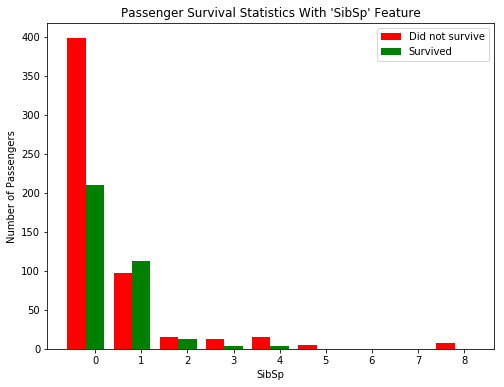

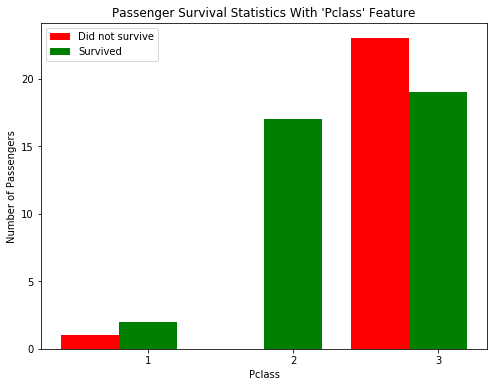

In [37]:
survival_stats(data, outcomes, 'SibSp')
survival_stats(data, outcomes, 'Pclass', ["Age < 10"])